In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
housing = pd.read_csv('UCI_Credit_Card.csv')
housing.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


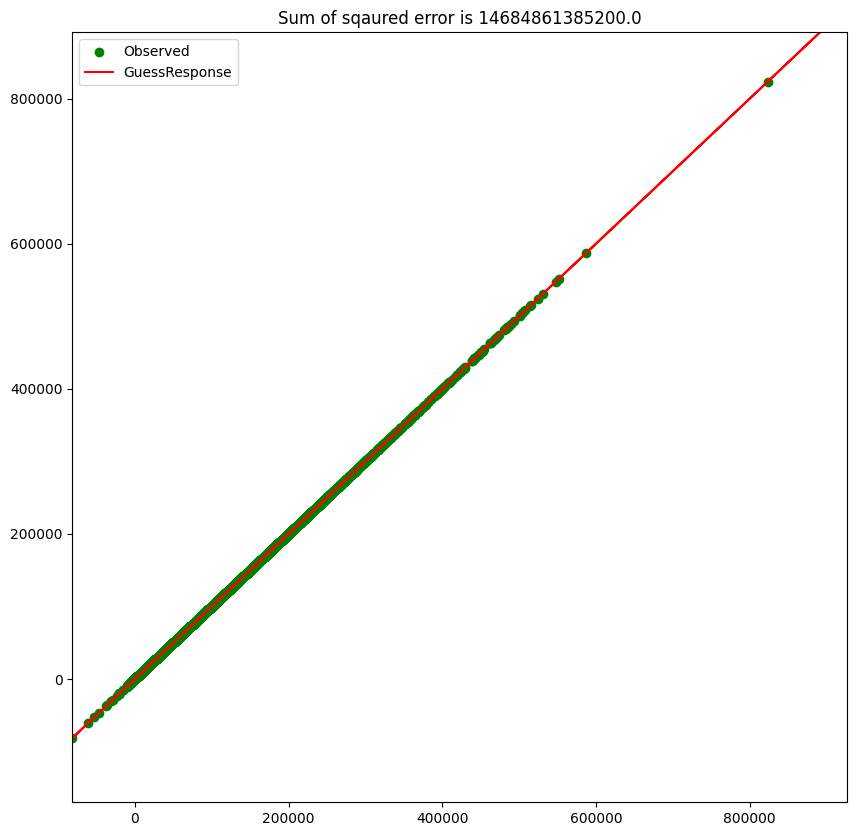

In [5]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['BILL_AMT5']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['BILL_AMT4'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['BILL_AMT5'], housing['BILL_AMT5'], color='g', label='Observed')
plt.plot(housing['BILL_AMT5'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['BILL_AMT5'].min()-2, housing['BILL_AMT5'].max()+2)
plt.ylim(housing['BILL_AMT4'].min()-2, housing['BILL_AMT4'].max()+2)
plt.show()

In [6]:
model = smf.ols(formula='BILL_AMT5 ~ LIMIT_BAL', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LIMIT_BAL']

/var/folders/ft/13vjdvvx6cz9kjsf3mxdsghm0000gn/T/ipykernel_27475/2259460545.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_ols = model.params[0]
/var/folders/ft/13vjdvvx6cz9kjsf3mxdsghm0000gn/T/ipykernel_27475/2259460545.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_ols = model.params[1]


<Axes: xlabel='BILL_AMT4', ylabel='BILL_AMT5'>

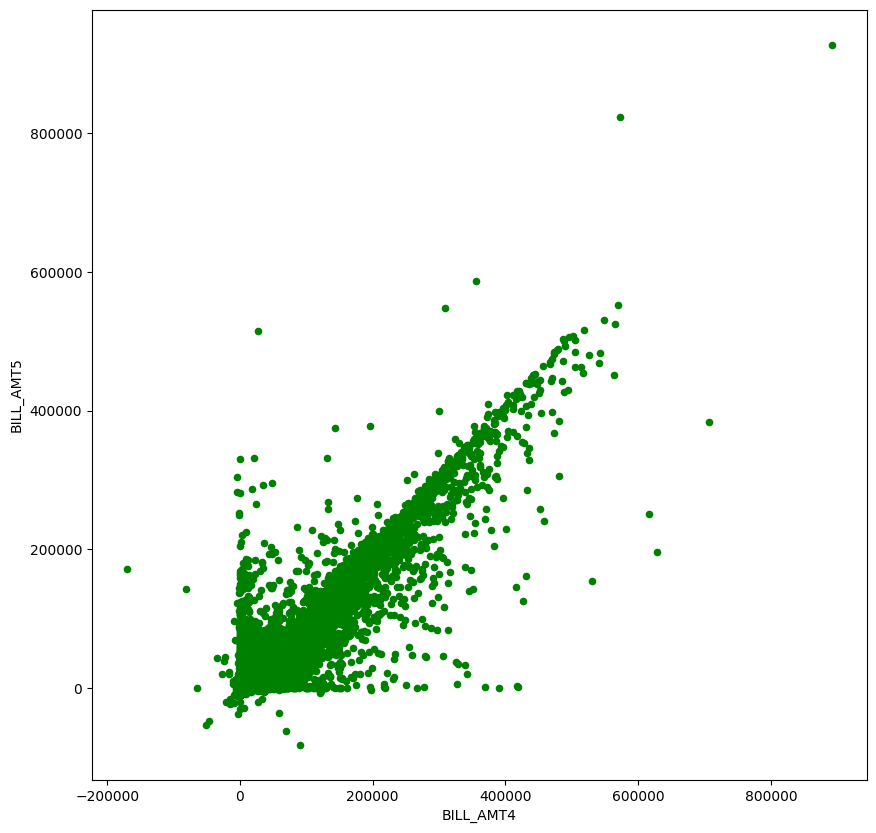

In [8]:
housing.plot(kind='scatter', x='BILL_AMT4', y='BILL_AMT5', figsize=(10, 10), color='g')

In [9]:
# Independence = Get all errors (residuals): 

housing['error'] = housing['BILL_AMT5'] - housing['BestResponse']

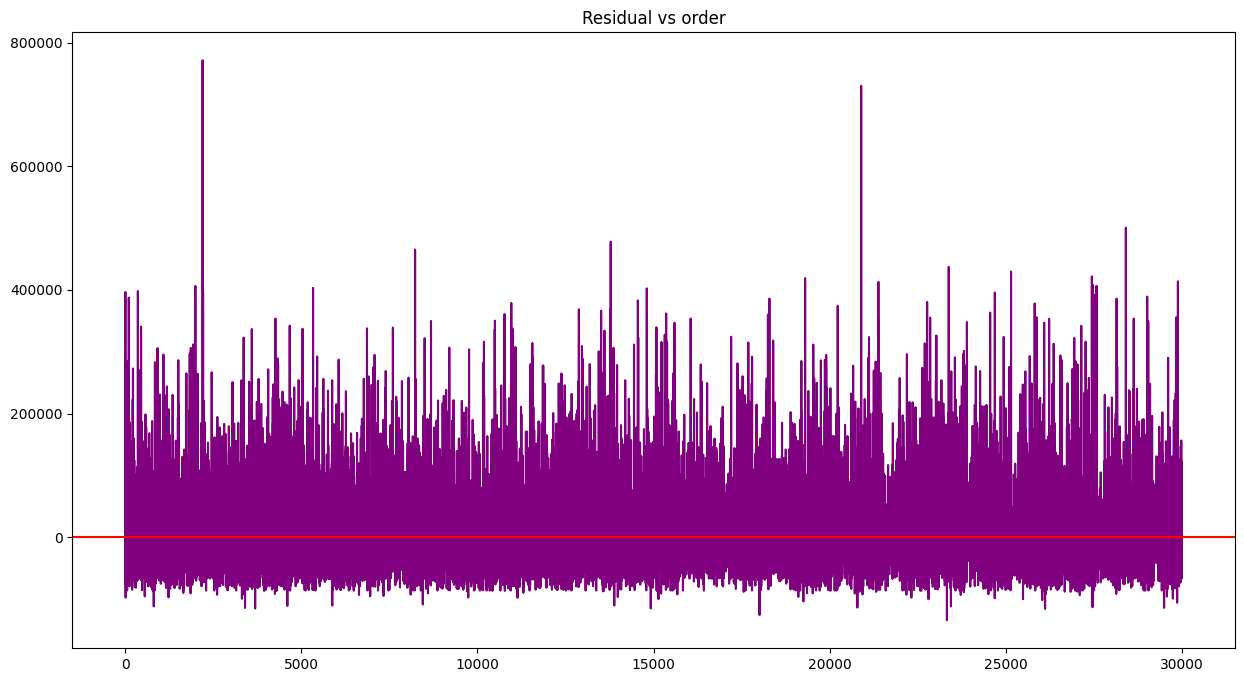

In [10]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [11]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BILL_AMT5   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2871.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:19:38   Log-Likelihood:            -3.7166e+05
No. Observations:               30000   AIC:                         7.433e+05
Df Residuals:                   29998   BIC:                         7.433e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.712e+04    547.568     31.258      0.000     1.6e+04    1.82e+04
LIMIT_BAL      0.1385      0.003     53.585      0.000       0.133       0.144
==============================================================================
Omnibus:                    14752.341   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122573.318
Skew:                           2.211   Prob(JB):                         0.00
Kurtosis:                      11.860   Cond. No.                     3.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

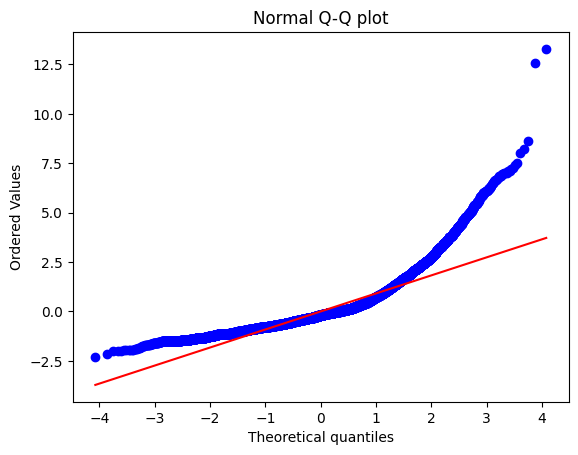

In [12]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

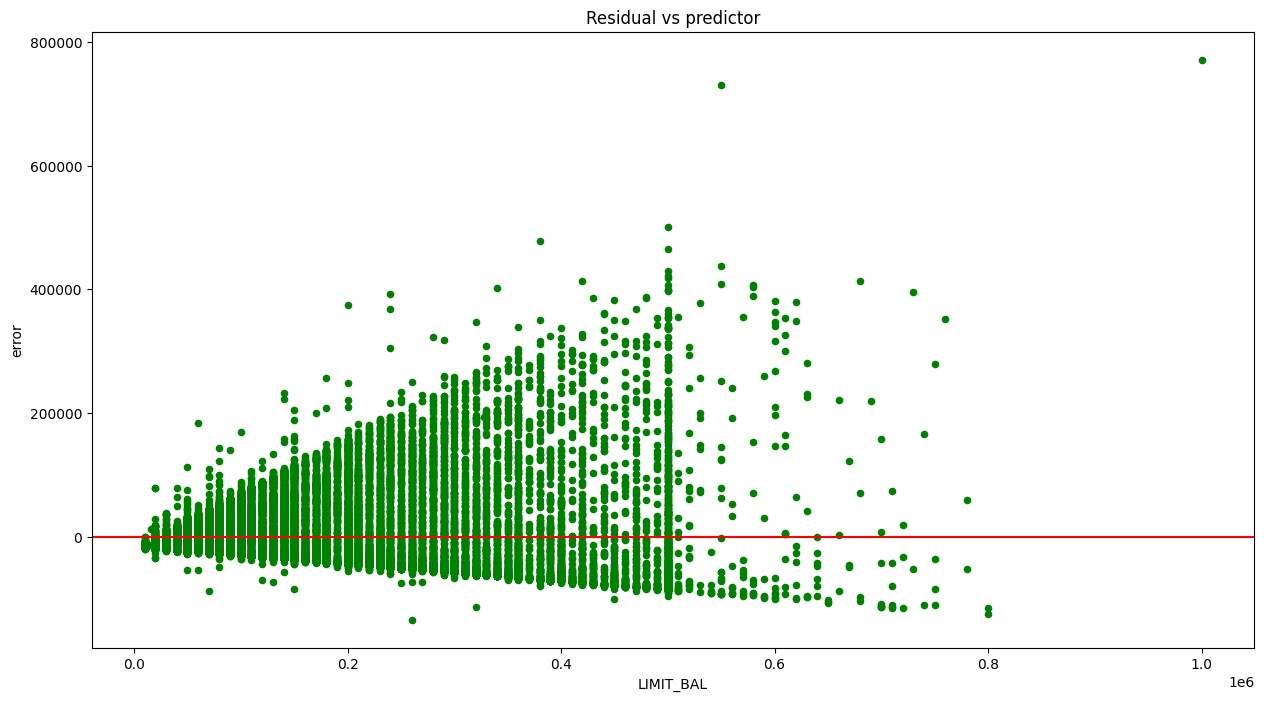

In [14]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LIMIT_BAL', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

In [15]:
# Conclusively, we can see that the regression model (MEDV~LSTAT) violates all four assumptions. 
# Therefore, we cannot make statistical inference using this model.